# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [531]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')
url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [532]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [533]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [534]:
table = soup.find('table')
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/7/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-7-2021">
     14,503.93654
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-7-2021">
     USD IDR rate for 7/7/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/6/2021
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/IDR


Do the scrapping process here (please change this markdown with your explanation)

In [535]:
temp = [] #initiating a tuple
baris = table.find_all('tr')

for tr in baris:
    td = tr.find_all('td')
    row =[i.text for i in td]
    temp.append(row)
    
temp

[['7/7/2021', 'Wednesday', '14,503.93654 IDR', 'USD IDR rate for 7/7/2021'],
 ['7/6/2021', 'Tuesday', '14,469.58258 IDR', 'USD IDR rate for 7/6/2021'],
 ['7/5/2021', 'Monday', '14,493.33968 IDR', 'USD IDR rate for 7/5/2021'],
 ['7/2/2021', 'Friday', '14,497.65100 IDR', 'USD IDR rate for 7/2/2021'],
 ['7/1/2021', 'Thursday', '13,270.37815 IDR', 'USD IDR rate for 7/1/2021'],
 ['6/30/2021', 'Wednesday', '14,491.89811 IDR', 'USD IDR rate for 6/30/2021'],
 ['6/29/2021', 'Tuesday', '13,215.84052 IDR', 'USD IDR rate for 6/29/2021'],
 ['6/28/2021', 'Monday', '14,439.22236 IDR', 'USD IDR rate for 6/28/2021'],
 ['6/25/2021', 'Friday', '14,426.82283 IDR', 'USD IDR rate for 6/25/2021'],
 ['6/24/2021', 'Thursday', '14,436.21247 IDR', 'USD IDR rate for 6/24/2021'],
 ['6/23/2021', 'Wednesday', '14,440.32729 IDR', 'USD IDR rate for 6/23/2021'],
 ['6/22/2021', 'Tuesday', '14,396.08712 IDR', 'USD IDR rate for 6/22/2021'],
 ['\n\n\n\n\n\n'],
 ['6/21/2021', 'Monday', '14,426.42481 IDR', 'USD IDR rate for 

## Creating data frame & Data wrangling

Put the array into dataframe

In [536]:
import pandas as pd

df = pd.DataFrame(temp,columns =['ExchangeDate','DayName','Price','Remarks'])
df.head()

,ExchangeDate,DayName,Price,Remarks
0,7/7/2021,Wednesday,"14,503.93654 IDR",USD IDR rate for 7/7/2021
1,7/6/2021,Tuesday,"14,469.58258 IDR",USD IDR rate for 7/6/2021
2,7/5/2021,Monday,"14,493.33968 IDR",USD IDR rate for 7/5/2021
3,7/2/2021,Friday,"14,497.65100 IDR",USD IDR rate for 7/2/2021
4,7/1/2021,Thursday,"13,270.37815 IDR",USD IDR rate for 7/1/2021


In [537]:
df.describe()

,ExchangeDate,DayName,Price,Remarks
count,131,129,129,129
unique,130,5,129,129
top,\n\n\n\n\n\n,Wednesday,"14,048.72649 IDR",USD IDR rate for 4/9/2021
freq,2,26,1,1


In [538]:
df.sort_values(by='ExchangeDate')

,ExchangeDate,DayName,Price,Remarks
36,\n\n\n\n\n\n,None,None,None
12,\n\n\n\n\n\n,None,None,None
129,1/11/2021,Monday,"14,137.24151 IDR",USD IDR rate for 1/11/2021
128,1/12/2021,Tuesday,"14,074.81444 IDR",USD IDR rate for 1/12/2021
127,1/13/2021,Wednesday,"14,125.90174 IDR",USD IDR rate for 1/13/2021
...,...,...,...,...
4,7/1/2021,Thursday,"13,270.37815 IDR",USD IDR rate for 7/1/2021
3,7/2/2021,Friday,"14,497.65100 IDR",USD IDR rate for 7/2/2021
2,7/5/2021,Monday,"14,493.33968 IDR",USD IDR rate for 7/5/2021
1,7/6/2021,Tuesday,"14,469.58258 IDR",USD IDR rate for 7/6/2021


In [539]:
#drop wrong data
df=df.dropna(how='any')
df.describe()

,ExchangeDate,DayName,Price,Remarks
count,129,129,129,129
unique,129,5,129,129
top,5/18/2021,Wednesday,"14,048.72649 IDR",USD IDR rate for 4/9/2021
freq,1,26,1,1


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [540]:
#TODO :
# Change ExchangeDate to datetime64 data type
df[['ExchangeDate']] = df[['ExchangeDate']].astype('datetime64')
# Change DayName to Category data type
df['DayName'] = df['DayName'].astype('category')
# # Remove or split Price column for IDR and change Price to float64 data type
df['Price'] = df['Price'].str.replace('IDR','')
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float64')
#for visualisation only
df['ExDate'] = df['ExchangeDate'].dt.strftime('%d-%m-%Y')

df.dtypes

ExchangeDate    datetime64[ns]
DayName               category
Price                  float64
Remarks                 object
ExDate                  object
dtype: object

In [541]:
# Drop remark columns - optional
df=df.drop('Remarks',axis=1)

In [542]:
#Sort by Exchange Date
df.sort_values(by='ExchangeDate',ascending=True).head()

,ExchangeDate,DayName,Price,ExDate
130,2021-01-08,Friday,13991.16348,08-01-2021
129,2021-01-11,Monday,14137.24151,11-01-2021
128,2021-01-12,Tuesday,14074.81444,12-01-2021
127,2021-01-13,Wednesday,14125.90174,13-01-2021
126,2021-01-14,Thursday,14070.58746,14-01-2021


In [528]:
df=df.set_index('ExchangeDate')
df

,DayName,Price,ExDate
ExchangeDate,,,
2021-07-07,Wednesday,14503.93654,07-07-2021
2021-07-06,Tuesday,14469.58258,06-07-2021
2021-07-05,Monday,14493.33968,05-07-2021
2021-07-02,Friday,14497.65100,02-07-2021
2021-07-01,Thursday,13270.37815,01-07-2021
...,...,...,...
2021-01-14,Thursday,14070.58746,14-01-2021
2021-01-13,Wednesday,14125.90174,13-01-2021
2021-01-12,Tuesday,14074.81444,12-01-2021


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [513]:
min_rate=df.min()[['Price','ExDate']].to_list()
max_rate=df.max()[['Price','ExDate']].to_list()
avg_rate=df.mean().to_list()
avg_rate

C:\Users\AKRAM\AppData\Local\Temp/ipykernel_8024/7672139.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg_rate=df.mean().to_list()


[14268.513698527131]


(Put your analysis and conclusion here.)

<AxesSubplot:xlabel='Exchange Date'>

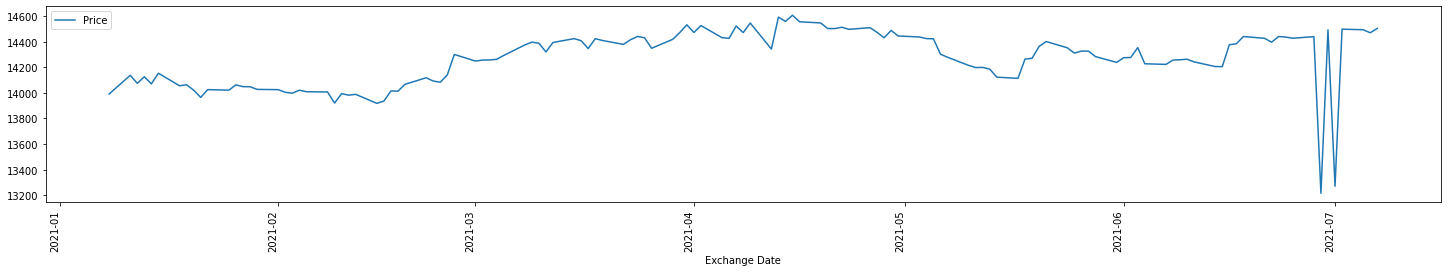

In [529]:

df.plot(
    figsize=(25,4), 
    rot='vertical',
    xlabel='Exchange Date'
)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

<AxesSubplot:xlabel='Periode'>

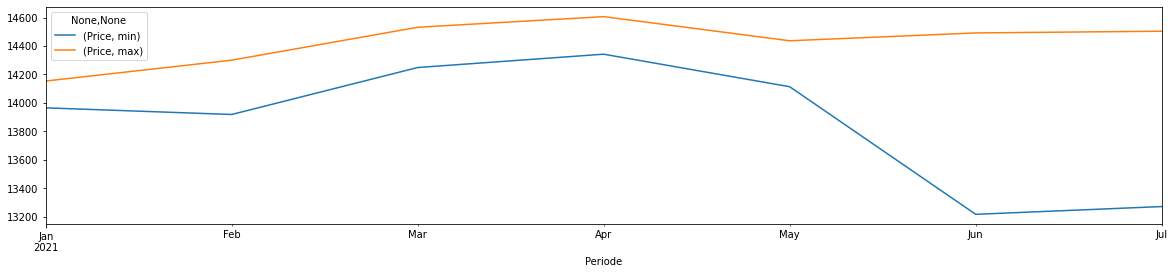

In [331]:

df.groupby('Periode').agg({'Price':['min','max']}).plot(kind='line',figsize=(20,4))